<a href="https://colab.research.google.com/github/bnsreenu/python_for_microscopists/blob/master/355_NetworkX_and_RDFLib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/8eDWmLp_TKA




Different Ways to Represent Knowledge Graphs:
1. NetworkX approach: Simple Python dictionaries and graphs
2. RDFLib approach: Using Resource Description Framework (RDF) triples
   - Subject (node) -> Predicate (relationship) -> Object (node/value)

Let's implement both approaches for a simple Python learning path.


In [ ]:
!pip install networkx rdflib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.9/564.9 kB 7.8 MB/s eta 0:00:00


Storing Metadata: NetworkX vs RDF Triples

**NetworkX Approach:**

Uses Python dictionaries (key-value pairs) <br>
Example structure: <br>

topics = {
    'python_basics': {
        'difficulty': 'beginner',
        'description': 'Basic Python concepts'
    }
}

<br>


*   Simple and intuitive for Python developers
*   Flexible: can add or modify attributes easily
*   Less formal structure: you can add any kind of data
*   Limited to Python's data types

<p><br>


**RDF Triples Approach:**

Uses Subject-Predicate-Object format <br>
Example structure: <br>

(subject, predicate, object) <p>
Example:<br>
(TOPIC.python_basics, PROP.difficulty, "beginner") <br>
(TOPIC.python_basics, PROP.description, "Basic Python concepts") <br>



*   More formal and standardized
*   Better for sharing data across different systems
*   Can link to other knowledge bases on the web
*   Supports semantic reasoning
*   More complex to understand and implement

<p><br>


Approach 1: Using NetworkX
Shortest Path: python_basics -> data_structures -> advanced_python -> bioimage_analysis
 


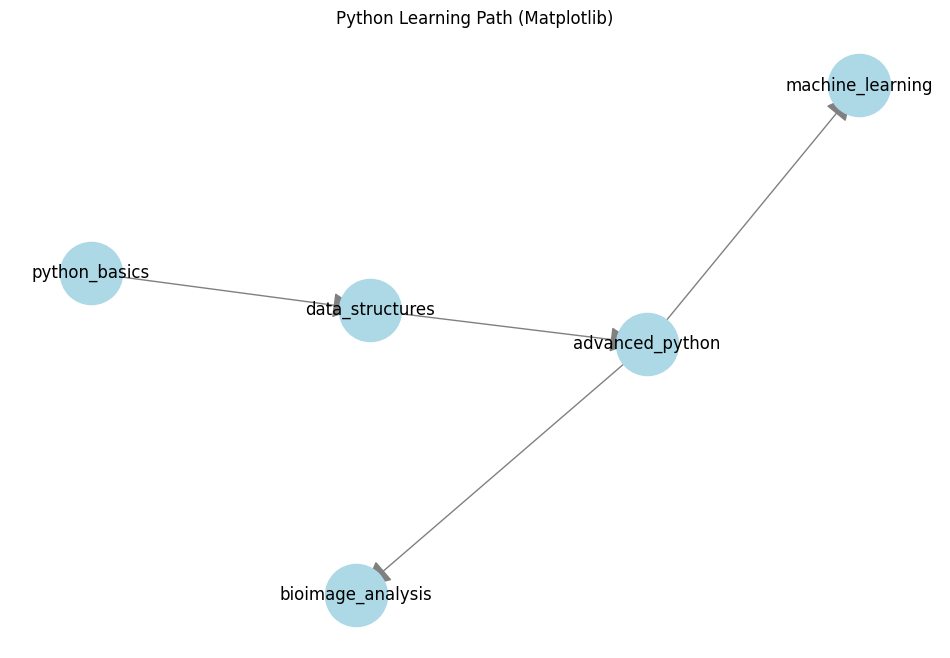

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Approach 1: Using NetworkX
print("Approach 1: Using NetworkX")

# Create a directed graph
G = nx.DiGraph()

# Define nodes (topics) with metadata
topics = {
    'python_basics': {                                #topic
        'difficulty': 'beginner',                       #metadata
        'description': 'Basic Python concepts'          #metadata
    },
    'data_structures': {
        'difficulty': 'intermediate',
        'description': 'Python data structures'
    },
    'advanced_python': {
        'difficulty': 'advanced',
        'description': 'Advanced Python concepts'
    },
    'machine_learning': {
        'difficulty': 'advanced',
        'description': 'Machine Learning with Python'
    },
    'bioimage_analysis': {
        'difficulty': 'advanced',
        'description': 'Bioimage Analysis with Python'
    }
}

# Add nodes to graph, along with metadata. e.g., create a node 'python_basics'
# with attributes {'difficulty': 'beginner', 'description': 'Basic Python concepts'}

for topic, metadata in topics.items():
    G.add_node(topic, **metadata)

# Add edges (relationships) with weights
relationships = [
    ('python_basics', 'data_structures', {'weight': 1.0}),
    ('data_structures', 'advanced_python', {'weight': 0.8}),
    ('advanced_python', 'machine_learning', {'weight': 0.7}),
    ('advanced_python', 'bioimage_analysis', {'weight': 0.7})
]

G.add_edges_from(relationships)

# Query: Find the shortest path from python_basics to bioimage_analysis
shortest_path = nx.shortest_path(G, source='python_basics', target='bioimage_analysis')
print("Shortest Path:", " -> ".join(shortest_path))
print(" ")

# Visualize using Matplotlib
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)
nx.draw_networkx_labels(G, pos)

# Draw edges with arrows
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=40)


plt.title("Python Learning Path (Matplotlib)")
plt.axis('off')
plt.show()


In [ ]:
from rdflib import Graph, Namespace, URIRef, Literal
from rdflib.namespace import RDF, RDFS

# Create an RDF graph
g = Graph()

# Define a namespace for our ontology
EX = Namespace("http://example.org/")

# Add nodes (topics) as RDF triples
topics = {
    'python_basics': {
        'difficulty': 'beginner',
        'description': 'Basic Python concepts'
    },
    'data_structures': {
        'difficulty': 'intermediate',
        'description': 'Python data structures'
    },
    'advanced_python': {
        'difficulty': 'advanced',
        'description': 'Advanced Python concepts'
    },
    'machine_learning': {
        'difficulty': 'advanced',
        'description': 'Machine Learning with Python'
    },
    'bioimage_analysis': {
        'difficulty': 'advanced',
        'description': 'Bioimage Analysis with Python'
    }
}

# Add topics and metadata to the RDF graph
# Add topics and metadata to the RDF graph
# Each g.add() call creates an RDF triple (subject, predicate, object):
# Subject: EX[topic] (the resource being described, e.g., python_basics)
# Predicate: RDFS.label, EX.difficulty, EX.description (the property or relationship)
# Object: Literal(topic), Literal(metadata['difficulty']), Literal(metadata['description']) (the value)
# Note: A literal can be any data value such as a string, a number, or a date (as opposed to URI)

for topic, metadata in topics.items():
    topic_uri = EX[topic]
    print(topic_uri)      # http://example.org/python_basics etc.
    g.add((topic_uri, RDFS.label, Literal(topic)))                        # RDFS.label is a standard property in RDF Schema
    g.add((topic_uri, EX.difficulty, Literal(metadata['difficulty'])))    # EX.difficulty is a custom property that we defined for our specific use case
    g.add((topic_uri, EX.description, Literal(metadata['description'])))  # EX.description is also a custom property that we defined for our specific use case

# Add edges (relationships) with weights as RDF triples
relationships_with_weights = [
    ('python_basics', 'data_structures', 1.0),
    ('data_structures', 'advanced_python', 0.8),
    ('advanced_python', 'machine_learning', 0.7),
    ('advanced_python', 'bioimage_analysis', 0.7)
]

# Add relationships and weights
for src, tgt, weight in relationships_with_weights:
    g.add((EX[src], EX.requires, EX[tgt]))
    g.add((EX[src], EX[f'weight_{tgt}'], Literal(weight)))


# Query: Retrieve the weight for each relationship of python_basics
query_weights = """
PREFIX ex: <http://example.org/>
SELECT ?topic ?weight WHERE {
    ex:python_basics ex:requires ?topic .
    ex:python_basics ex:weight_data_structures ?weight .
}
"""
# Execute the query
print("-"*40)
print("Weights for topics that python_basics requires:")
for row in g.query(query_weights):
    print(f"Topic: {row.topic}, Weight: {row.weight}")

# Serialize and print the RDF graph in Turtle format for visualization
print("\nRDF Graph (Turtle Format):")
print(g.serialize(format="turtle"))


http://example.org/python_basics
http://example.org/data_structures
http://example.org/advanced_python
http://example.org/machine_learning
http://example.org/bioimage_analysis
----------------------------------------
Weights for topics that python_basics requires:
Topic: http://example.org/data_structures, Weight: 1.0

RDF Graph (Turtle Format):
@prefix ns1: <http://example.org/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ns1:python_basics rdfs:label "python_basics" ;
    ns1:description "Basic Python concepts" ;
    ns1:difficulty "beginner" ;
    ns1:requires ns1:data_structures ;
    ns1:weight_data_structures 1e+00 .

ns1:advanced_python rdfs:label "advanced_python" ;
    ns1:description "Advanced Python concepts" ;
    ns1:difficulty "advanced" ;
    ns1:requires ns1:bioimage_analysis,
        ns1:machine_learning ;
    ns1:weight_bioimage_analysis 7e-01 ;
    ns1:weight_machine_learning 7e-01 .

ns1:bioimage_analy

The Turtle format is used to represent RDF triples. This snippet shows metadata about the topic python_basics, its description, difficulty level, its prerequisite data_structures, and an associated weight. The prefixes make the graph more readable by shortening the URIs.

<p>

**Prefixes:** The @prefix lines define short aliases for commonly used namespaces, allowing the use of short labels instead of long URLs. For example, ns1: is an alias for the namespace <http://example.org/>, and rdfs: is an alias for the RDF Schema standard namespace.
<p>

**RDF Triples:** Each line after the prefix definitions represents an RDF triple, which is a statement about a resource. A triple consists of:
<p>

**Subject:** What the statement is about (e.g., ns1:python_basics). <br>
**Predicate:** The relationship or property (e.g., rdfs:label, ns1:description).<br>
**Object:** The value or target of the relationship (e.g., "python_basics", "Basic Python concepts", or ns1:data_structures).